# **Capstone Project Module 3**

***Case Study: Bike Sharing***

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation
___

## **Business Problem Understanding**

### **Context**

Bike-sharing systems are a new generation of traditional bike rentals where the whole process, from membership, rental, and return back, has become automatic. Through these systems, a user can easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues.

Apart from interesting real-world applications of bike-sharing systems, the characteristics of data generated by these systems make them attractive for research. Unlike other transport services such as buses or subways, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike-sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected by monitoring these data.

### **Problem Statement**

One of the biggest challenges faced by the bike-sharing systems is determining what kind of condition that would attract a lot of potential users in renting their bikes. Collecting such data daily and studying its pattern may grant benefits to the company in predicting which specific day or season and whatever condition that leads to a massive amount of potential users.

Despite all the easabilities provided, however bike-sharing systems still face drawbacks in certain aspect where one of them has to do with weather condition. Normally, a clear weather or a cloudy one would attract majority of users in renting bikes, while certain conditions like a few mist and cloudy scenery or perhaps light rain may still be considered acceptable for some users. However when the weather goes to an extreme length such as heavy rain, thunderstorm, thick snow, or massive fog, almost none of the potential users would be willing to rent a bike. Other factors such as season and holiday festivity also play a part in tracking a number of consistent user daily. The systems alone cannot predict the pattern of ongoing users based on these factors mentioned, therefore it is very important to study how these factors correlate with each other which will generate a lot of potential users in renting their bikes.

### **Goals**

As a **Data Analyst**, it is required by the **Bike-Sharing Company Director** as the stakeholder to build a Machine Learning model that is capable in predicting what is the most optimum condition in attracting a massive number of renters based on underlying factors such as weather condition, season, and holiday festivity. With the right usage of prediction model, it may assist bike-sharing company to generate income by studying its pattern and at the same time, minimize the losses subjected from bike maintenance and potential risks from vandalism and theft incidents.

### **Analytic Approach**

In order to determine what kind of condition that would attract a lot of potential users in renting bikes, the approach would be performing a data analysis to explore and gather patterns existing within data, followed by generating a regression type model as a testing method in checking whether there is a existing correlation between various features and number of bike renters in the form of math equation. The regression type model will also be utilized to predict the most optimum condition in attracting a massive number of renters so the bike-sharing company can gather insights on what various business strategy that can be implemented during such scenario which is profitable for the company.

### **Metric Evaluation**

Chosen metric evaluation for regression type model would be RMSE, MAE, and MAPE. Root Mean Squared Error (RMSE) is the square root of the mean squared error between the predicted and actual values. Mean Absolute Error (MAE) is the mean absolute difference between the actual and the predicted values. Mean Absolute Percentage Error (MAPE) is the mean of all absolute percentage errors between the predicted and actual values. The smaller the values generated by RMSE, MAE, and MAPE, the more accurate the model would be in making prediction.

Besides that, other metric evaluation such as R-Squared and Adjusted R-Squared may be utilized if the chosen final model would be a linear model. R-Squared value refers to the coefficient of determination used for a regression type model to measure how great is a regression line in representing data. R-Squared value lies between 0 - 1 and it is expected to be as high as possible. The closer it gets to 1, the better the regression line in representing data.

## **Dataset**

Before addressing the challenge, analysis needs to be performed on the dataset. Dataset can be accessed [here](https://drive.google.com/drive/folders/17Mw_4wSRiBB5vLLQJN137AlAbyB3CLFx).

## **Data Understanding**

Dataset consists of bike-sharing system regarding information on weather condition, season, holiday festivity, surrounding temperature, humidity, and time which may affect the number of renters spanning from 2011 to 2012.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | Normalized humidity. The values are divided into 100% (max) |
| weathersit | Integer | 1: Clear, Few Clouds, Partly Cloudy<br />2: Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds, Mist<br />3: Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds<br />4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | Holiday or not (0: Not Holiday, 1: Holiday) |
| season | Integer | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall) |
| atemp | Float | Normalized feeling temperature in Celsius<br />The values are derived via (t - tmin)/(tmax - tmin), tmin = -16 and tmax = +50 (only in hourly scale) |
| temp | Float | Normalized temperature in Celsius<br />The values are derived via (t - tmin)/(tmax - tmin), tmin= -8 and tmax = +39 (only in hourly scale) |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Count of casual users |
| registered | Integer | Count of registered users |
| cnt | Integer | Count of total rental bikes including both casual and registered |

## **Import List**

In [266]:
# Library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Train Test Split
from sklearn.model_selection import train_test_split

# Impute Missing Values
from sklearn.impute import SimpleImputer # Mean, Median, Most Frequent (Mode), Constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # Regression
from sklearn.impute import KNNImputer # KNN Regression

# Encoding
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

# Column Transformer & Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# Regression Algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Regression Metric
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Classification Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

# Classification Metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
# from imblearn.pipeline import Pipeline

# Ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## **Load Dataset**

In [267]:
dfBikeSharingRaw = pd.read_csv('data_bike_sharing.csv')
dfBikeSharingRaw

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [268]:
dfBikeSharingRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


## **Data Preprocessing**

In this phase, data cleaning will go underway where most of its part will feature a raw dataset is being inspected and checked to eliminate possible anomalies before it can be used for a further analysis. Several things to be considered in this phase are as following:

- Feature dropping: Drop features that are irrelevant with the main problem.

- Handling missing values: perform inspection on the dataset to see whether there are exisiting missing values. Should they exist, there are various possible methods that may be conducted to handle them such as dropping rows and or columns that possess missing values or updating those missing values with values that are close to their real values (using mean, median, or mode), or different imputing techniques may also be considered.

- Handling outliers: perform inspection on the dataset to see whether there are exisiting outliers. Should they exist, there are various possible methods that may be conducted to handle them such as dropping those outliers or performing data transformation.

- Handling formatting issues: perform inspection on the dataset to see whether there are exisiting formatting issues. Should they exist, there are various possible methods that may be conducted to handle them such as converting those data with the faulty format to match with the proper ones.

- Handling duplicates: perform inspection on the dataset to see whether there are exisiting duplicates. Should they exist, there are various possible methods that may be conducted to handle them such as dropping those duplicates in order to avoid the bias during modeling phase.

- Handling ambiguous data: perform inspection on the dataset to see whether there are exisiting ambiguous data. Should they exist, there are various possible methods that may be conducted to handle them such as dropping those ambiguous data.

- Handling inconsistencies: perform inspection on the dataset to see whether there are exisiting inconsistencies. Should they exist, there are various possible methods that may be conducted to handle them such as dropping those inconsistencies.

Begin the process by creating a duplicate DataFrame from the original one. Check the info and descriptive statistics of the duplicate DataFrame too.

In [269]:
df_model = dfBikeSharingRaw.copy()

In [270]:
# Info check for each feature
listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col])) * 100,2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,dteday,object,0,0.0,731,"[2012-06-10, 2012-03-03]"
1,hum,float64,0,0.0,89,"[0.28, 0.37]"
2,weathersit,int64,0,0.0,4,"[1, 4]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[2, 3]"
5,atemp,float64,0,0.0,65,"[0.4091, 0.6061]"
6,temp,float64,0,0.0,50,"[1.0, 0.18]"
7,hr,int64,0,0.0,24,"[0, 16]"
8,casual,int64,0,0.0,305,"[183, 116]"
9,registered,int64,0,0.0,742,"[81, 451]"


In [271]:
# Descriptive Statistics of the DataFrame
display(df_model.describe(), df_model.describe(include = 'object'))

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


,dteday
count,12165
unique,731
top,2011-08-09
freq,22


### Formatting Issues

Based on the DataFrame info, the column named `dteday` is displayed under object data type. Therefore, it needs to be corrected to the proper format where the supposed data type should be datetime data type.

In [272]:
df_model['dteday'] = pd.to_datetime(df_model['dteday'])

In [273]:
max(df_model['dteday'])

Timestamp('2012-12-31 00:00:00')

In [274]:
df_model.info()
display(df_model.describe(), df_model.describe(include = 'datetime'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


,dteday
count,12165
unique,731
top,2011-08-09 00:00:00
freq,22
first,2011-01-01 00:00:00
last,2012-12-31 00:00:00


### Missing Values and Incomplete Data

In [275]:
df_model.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [276]:
df_model.isna().any()

dteday        False
hum           False
weathersit    False
holiday       False
season        False
atemp         False
temp          False
hr            False
casual        False
registered    False
cnt           False
dtype: bool

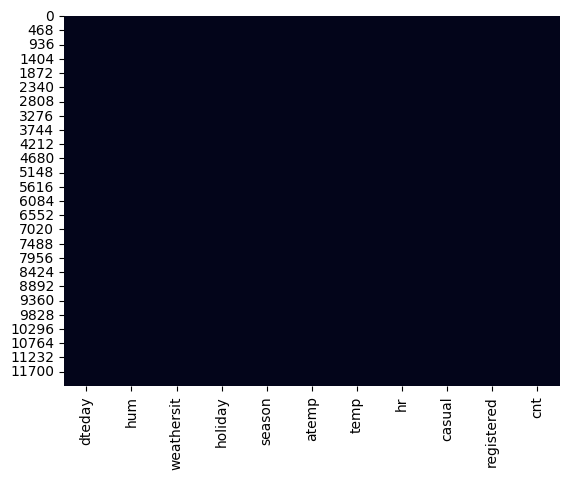

In [277]:
sns.heatmap(df_model.isna(), cbar = False);

It seems there is no missing value existing in the DataFrame after checking.

### Duplicates

In [278]:
data_duplicate = df_model[df_model.duplicated(subset=['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp',
                                         'temp', 'hr', 'casual', 'registered', 'cnt'])]
display(data_duplicate)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt


In [279]:
df_model[df_model.duplicated(keep = False)]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt


In [280]:
df_model.duplicated().sum()

0

It seems there is no duplicate existing in the DataFrame after checking.

### Feature Dropping

There are several considerations need to be taken into account before dropping feature in a DataFrame. Domain knowledge holds the most influence on determining whether irrelevant features exist where dropping them is required. In this case, `cnt` column is indirectly represented by both `casual` and `registered` columns where the number of casual users and register users makes up the total number of bike renters. Therefore, both `casual` and `registered` columns can be safely dropped and not necessarily needed in the further analysis part since the required subject is the potential number of bike renters regardless their status.

Besides that, `dteday` column is unnecessary to be involved during modeling process due to its timestamp form which can be represented by `season` column to determine the period. Therefore, it is also dropped as well.

In [281]:
df_model.drop(['dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [282]:
display(df_model)

,hum,weathersit,holiday,season,atemp,temp,hr,cnt
0,0.62,1,0,4,0.3485,0.36,16,250
1,0.64,1,0,2,0.5152,0.54,4,18
2,0.53,1,0,2,0.6212,0.62,23,107
3,0.87,2,0,2,0.3485,0.36,8,145
4,0.55,1,0,3,0.6970,0.76,18,857
...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,257
12161,0.62,1,0,3,0.7424,0.78,0,102
12162,0.60,2,1,1,0.2121,0.24,5,6
12163,0.77,2,0,2,0.4242,0.42,2,69


In [283]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         12165 non-null  float64
 1   weathersit  12165 non-null  int64  
 2   holiday     12165 non-null  int64  
 3   season      12165 non-null  int64  
 4   atemp       12165 non-null  float64
 5   temp        12165 non-null  float64
 6   hr          12165 non-null  int64  
 7   cnt         12165 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 760.4 KB


`dteday`, `casual`, and `registered` columns have been dropped from the DataFrame and the rest of the data cleaning phase can be continued.

### Outliers

Existing outliers in a DataFrame will definitely affect the analysis and modeling phase. However, not all outliers are bad since some of them may represent an extreme data point where its distributions are way out of the data point that lies in a majority. Once again, domain knowledge holds the most influence in determining the relevancy of outliers whether they should be removed from analysis or become a part of the DataFrame.

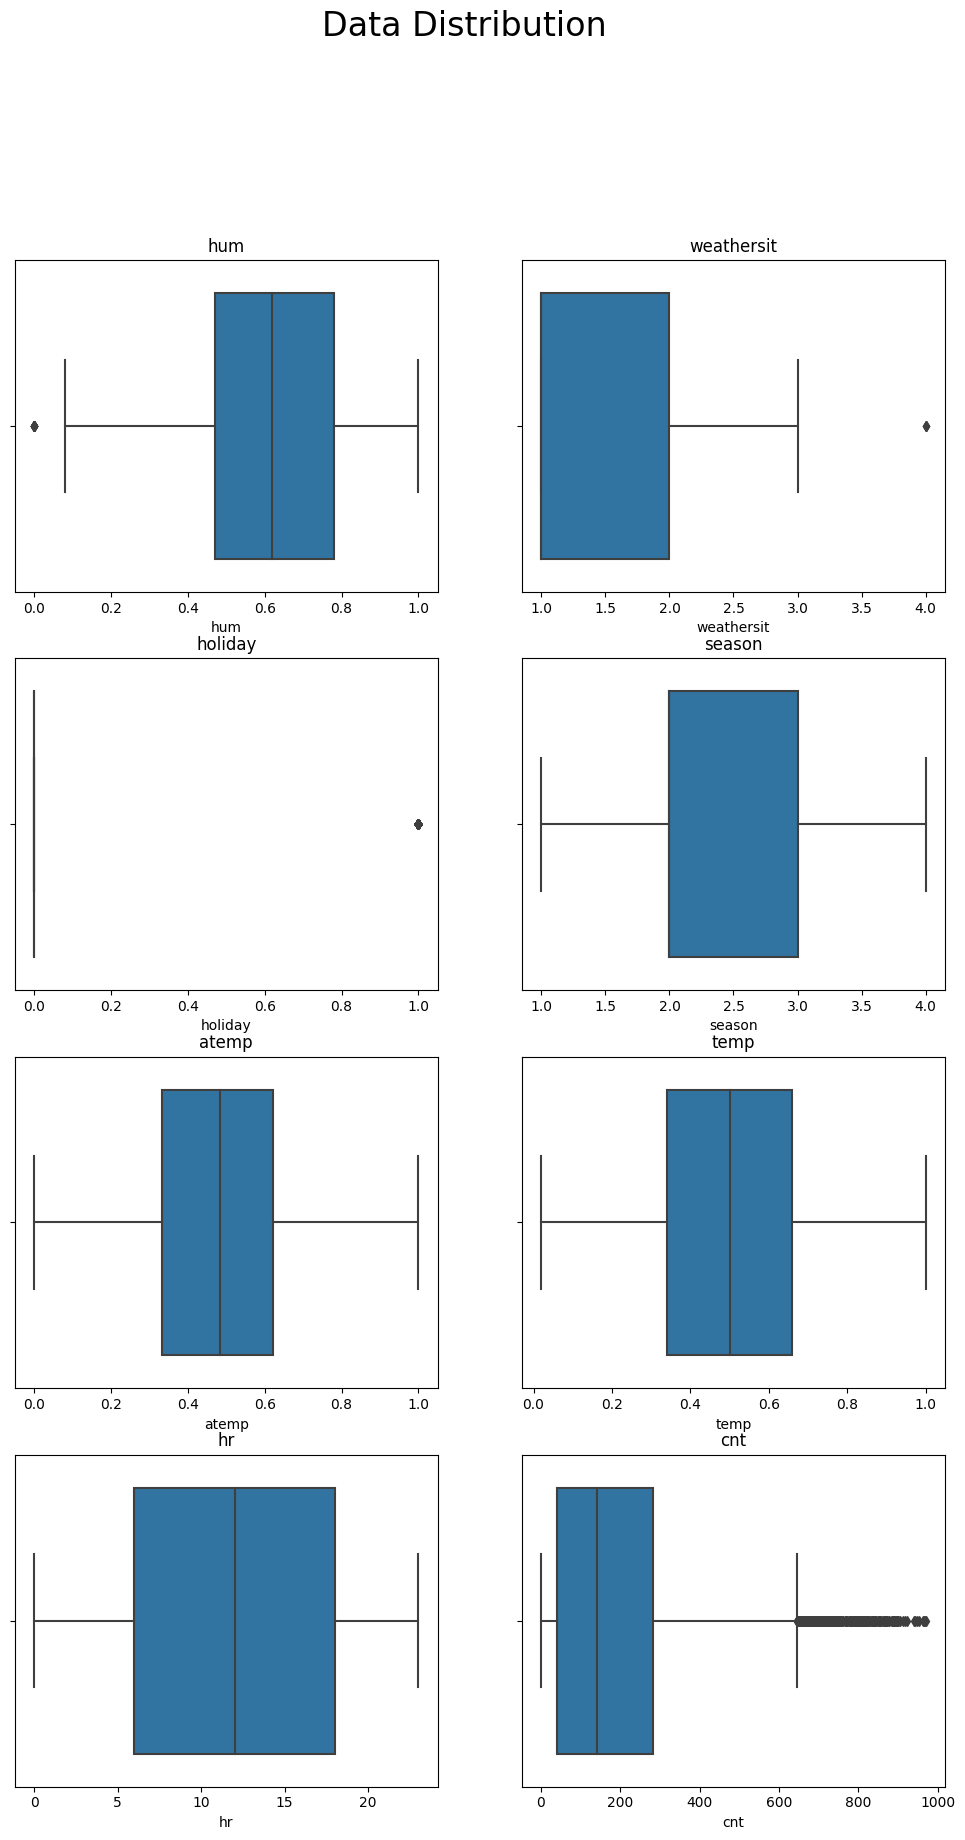

In [284]:
plt.figure(figsize = (12,25))

columns = ['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'cnt']

plotnumber = 1
for kolom in columns:
    plt.subplot(5, 2, plotnumber)
    sns.boxplot(data = df_model, x = kolom)
    plt.title(kolom)

    plotnumber +=1

plt.suptitle('Data Distribution', size = 24)
plt.show()

From the following features, only `hum`, `weathersit`, `holiday`, and `cnt` that have outliers exist within their boxplot distribution.

- `hum` column has an outlier where it shows a minimum value at 0.0. However, this anomaly is not significant since the humidity level is still within range from 0% (0.0) to 100% (1.0) which makes it acceptable.
- `weathersit` column has an outlier where it shows a maximum value at 4.0. However, this anomaly is not significant since the numerical pattern above are ways of differentiating the types of weather and it does not serve as certain level of measurement which makes it acceptable.
- `holiday` column has an outlier where it shows a maximum value at 1.0. However, this anomaly is not significant since the column purpose only to serve as a simple binary condition which makes it acceptable.
- `cnt` column has an outlier where it shows a maximum value at 970 renters. Despite the massive difference between its 75% percentile with the maximum value, however this anomaly is not significant since in the actual DataFrame there are indeed a massive number of potential bike renters recorded where majority of them are distributed between approximately of more than 600 renters up to 970 renters at most. It may look an extreme data point, however it is still conincide with the fact that there were days where massive bike renters happened to exist there which makes it acceptable.

In conclusion, all of these outliers are important and may be retained in the modeling phase.

### Correlation Matrix

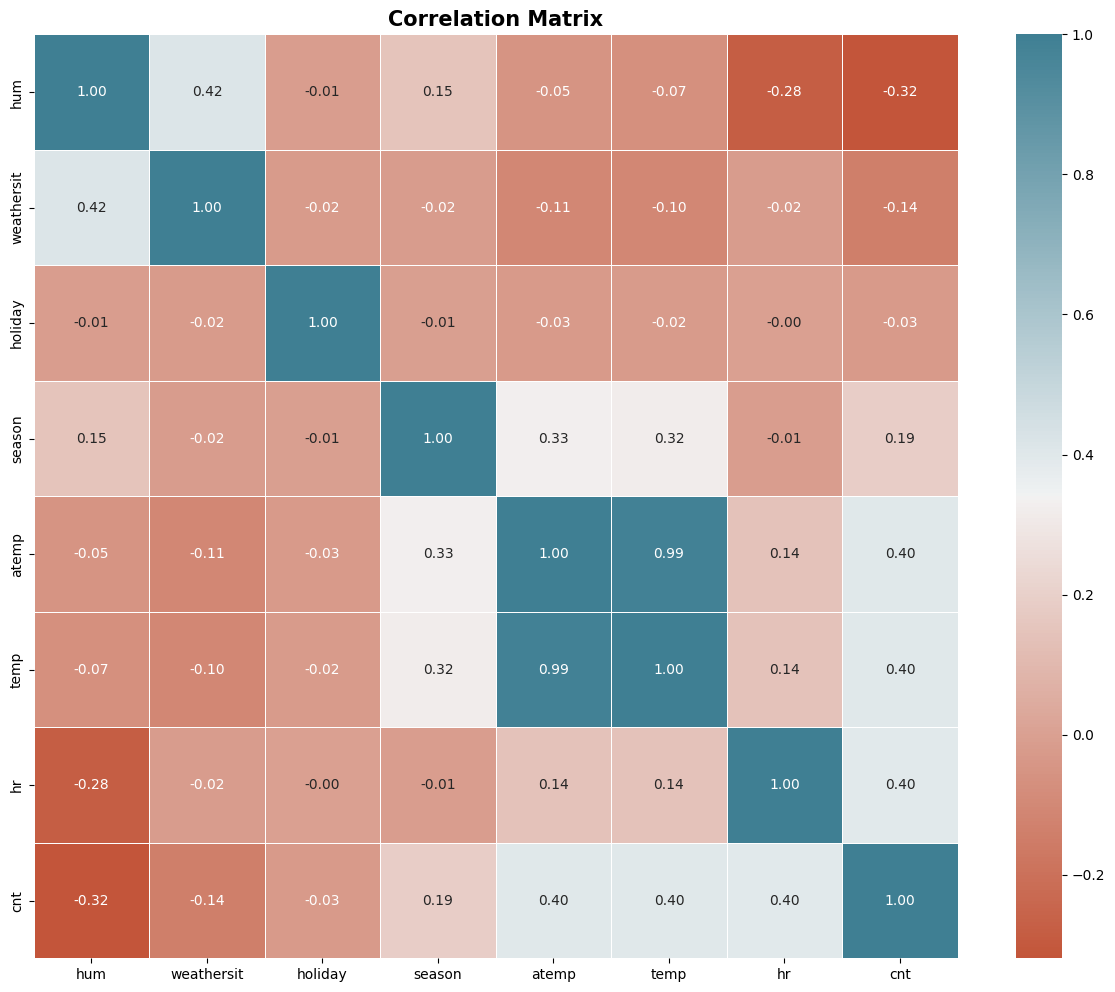

In [285]:
plt.figure(figsize = (15, 12))
palette = sns.diverging_palette(20, 220, n = 256)
corr = df_model.corr(method = 'pearson')
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = palette, square = True, linewidths = .5)
plt.title('Correlation Matrix', size = 15, weight = 'bold');

In the correlation matrix, there is no feature that shows a strong correlation towards `cnt` feature. At best, the highest correlation with `cnt` feature are shared by 3 columns which are `atemp`, `temp`, and `hr` with each possesses 0.40 where this value is considered a medium correlation.

- The larger the normalized feeling temperature (`atemp`), the more potential users in renting bikes.
- The larger the normalized temperature (`temp`), the more potential users in renting bikes.
- The closer it gets to midnight (`hr`), the more potential users in renting bikes.

## **Cleaned DataFrame**

With that procedure, that concludes the phase of data preprocessing and it is ready to be used in modeling phase.

In [286]:
df_model.head()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt
0,0.62,1,0,4,0.3485,0.36,16,250
1,0.64,1,0,2,0.5152,0.54,4,18
2,0.53,1,0,2,0.6212,0.62,23,107
3,0.87,2,0,2,0.3485,0.36,8,145
4,0.55,1,0,3,0.6970,0.76,18,857


In [287]:
listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col])) * 100,2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,hum,float64,0,0.0,89,"[0.24, 0.54]"
1,weathersit,int64,0,0.0,4,"[1, 3]"
2,holiday,int64,0,0.0,2,"[0, 1]"
3,season,int64,0,0.0,4,"[4, 3]"
4,atemp,float64,0,0.0,65,"[0.5455, 0.8485]"
5,temp,float64,0,0.0,50,"[0.04, 0.18]"
6,hr,int64,0,0.0,24,"[4, 20]"
7,cnt,int64,0,0.0,830,"[196, 349]"


In [288]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         12165 non-null  float64
 1   weathersit  12165 non-null  int64  
 2   holiday     12165 non-null  int64  
 3   season      12165 non-null  int64  
 4   atemp       12165 non-null  float64
 5   temp        12165 non-null  float64
 6   hr          12165 non-null  int64  
 7   cnt         12165 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 760.4 KB


In [289]:
print('Original DataFrame:', dfBikeSharingRaw.shape)
print('Cleaned DataFrame:',df_model.shape)

Original DataFrame: (12165, 11)
Cleaned DataFrame: (12165, 8)


Cleaned DataFrame still retains 12,165 data with 3 of its columns being dropped after preprocessing. Regression type model can be constructed afterwards.

## **Modeling**

### Encoding

In this phase, categorical features will be converted into numerical features so they can be utilized. For this DataFrame, One-Hot Encoding is chosen on `weathersit`, `holiday`, and `season` since these features have less amount of categories (lesser than 5). While the remaining features can be assigned under 'passthrough'.

In [358]:
transformer = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), ['weathersit', 'holiday', 'season'])
], remainder = 'passthrough')

### Data Splitting

In this phase, DataFrame is splitted into independent variable (X) and dependent variable (y). Independent variables consist of `dteday`, `hum`, `weathersit`, `holiday`, `season`, `atemp`, `temp`, and `hr`, while dependent variable consist of `cnt`.

In [359]:
X = df_model.drop(['cnt'], axis = 1)
y = df_model['cnt']

### Train and Test Splitting

In this phase, DataFrame is splitted into 2 parts which are 80% for data training and 20% for data testing.

In [360]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  
    test_size = 0.2,
    random_state = 88)

### Benchmark Model

After splitting DataFrame into data training and data testing, benchmark models are used to determine the reference model which later will be chosen as a comparison model. There are 5 different benchmark models chosen for this DataFrame which are Linear Regression, KNN Regression, Decision Tree Regression, Random Forest Regression, and XGB (Extreme Gradient Boosting) Regression.

In [361]:
# Define Algorithm for Benchmark Model
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state = 88)
rf = RandomForestRegressor(random_state = 88)
xgb = XGBRegressor(random_state = 88)

# Modeling is done in Logarithmic Scale, but will be inversed for interpretation
log_lr = TransformedTargetRegressor(lr, func = np.log, inverse_func = np.exp)
log_knn = TransformedTargetRegressor(knn, func = np.log, inverse_func = np.exp)
log_dt = TransformedTargetRegressor(dt, func = np.log, inverse_func = np.exp)
log_rf = TransformedTargetRegressor(rf, func = np.log, inverse_func = np.exp)
log_xgb = TransformedTargetRegressor(xgb, func = np.log, inverse_func = np.exp)

# Data Scaling
scaler = RobustScaler()

# Algorithm Candidates
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_R2 = []
mean_R2 = []
std_R2 = []

score_RMSE = []
mean_RMSE = []
std_RMSE = []

score_MAE = []
mean_MAE = []
std_MAE = []

score_MAPE = []
mean_MAPE = []
std_MAPE = []

# Finding Best Algorithm based on each Metric
for i in models:
    
    crossval = KFold(n_splits = 5, shuffle = True, random_state = 88)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # R-Squared
    model_cv_R2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = 'r2', 
        error_score = 'raise'
        )

    print(model_cv_R2, i)

    score_R2.append(model_cv_R2)
    mean_R2.append(model_cv_R2.mean())
    std_R2.append(model_cv_R2.std())

    # RMSE
    model_cv_RMSE = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = 'neg_root_mean_squared_error', 
        error_score = 'raise'
        )

    print(model_cv_RMSE, i)

    score_RMSE.append(model_cv_RMSE)
    mean_RMSE.append(model_cv_RMSE.mean())
    std_RMSE.append(model_cv_RMSE.std())

    # MAE
    model_cv_MAE = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = 'neg_mean_absolute_error', 
        error_score = 'raise'
        )

    print(model_cv_MAE, i)

    score_MAE.append(model_cv_MAE)
    mean_MAE.append(model_cv_MAE.mean())
    std_MAE.append(model_cv_MAE.std())

    # MAPE
    model_cv_MAPE = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = 'neg_mean_absolute_percentage_error', 
        error_score = 'raise'
        )

    print(model_cv_MAPE, i)

    score_MAPE.append(model_cv_MAPE)
    mean_MAPE.append(model_cv_MAPE.mean())
    std_MAPE.append(model_cv_MAPE.std())

[0.15439948 0.13906673 0.16754661 0.16733474 0.14782139] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-162.33654028 -168.54825574 -166.22712412 -163.1323543  -171.82408802] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-107.95694975 -112.8365266  -108.84741706 -109.54923971 -112.74306468] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.46616747 -1.39270537 -1.41195219 -1.48476116 -1.42778021] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.59423513 0.57799936 0.58696952 0.612638   0.58029915] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-112.45295906 -1

In [362]:
# Scoring Evaluation from previous 5 Algorithm Candidates
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regression', 'Decision Tree Regression', 'Random Forest Regression', 'XGBoost Regression'],
    'Mean R-Squared': mean_R2,
    'Std R-Squared': std_R2,
    'Mean RMSE': mean_RMSE,
    'Std RMSE': std_RMSE,
    'Mean MAE': mean_MAE,
    'Std MAE': std_MAE,
    'Mean MAPE': mean_MAPE,
    'Std MAPE': std_MAPE
})

,Model,Mean R-Squared,Std R-Squared,Mean RMSE,Std RMSE,Mean MAE,Std MAE,Mean MAPE,Std MAPE
0,Linear Regression,0.155234,0.011091,-166.413672,3.500111,-110.386640,2.026254,-1.436673,0.034076
1,KNN Regression,0.590428,0.012464,-115.878978,3.496473,-73.937170,1.926740,-0.805167,0.036536
2,Decision Tree Regression,0.416195,0.021810,-138.284639,1.969775,-87.781604,1.058958,-1.019949,0.040146
3,Random Forest Regression,0.633061,0.009161,-109.658206,1.936347,-69.578378,0.979832,-0.711388,0.037144
4,XGBoost Regression,0.674178,0.009509,-103.332628,2.172923,-65.879025,1.116975,-0.658831,0.028179


From the table, there is a significant difference between RMSE and MAE where RMSE would provide larger value due to the error value being squared first before being averaged. There are few conclusions that can be drawn:

- Based on mean R-Squared value, XGBoost Regression that has the best model compared to the rest of model considering its value that is the closest to 1, followed by Random Forest Regression.
- Based on mean RMSE, mean MAE, and mean MAPE value, XGBoost Regression that has the best model compared to the rest of model considering its value that is the closest to 0, followed by Random Forest Regression.

### Predict to Test Set with the Benchmark Model

Using the best 2 benchmark model from the previous simulation, test set is predicted with XGBoost Regression dan Random Forest Regression.

In [363]:
# Best 2 Benchmark Model
models = {
    'XGBoost Regression': XGBRegressor(random_state = 88),
    'Random Forest Regression': RandomForestRegressor(random_state = 88)
}

score_R2 = []
score_RMSE = []
score_MAE = []
score_MAPE = []

# Predict to Test Set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_R2.append(r2_score(y_test, y_pred))
    score_RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_MAE.append(mean_absolute_error(y_test, y_pred))
    score_MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R-Squared': score_R2, 'RMSE': score_RMSE, 'MAE': score_MAE, 'MAPE': score_MAPE}, index = models.keys())
score_before_tuning

,R-Squared,RMSE,MAE,MAPE
XGBoost Regression,0.707029,98.325651,64.759466,0.880770
Random Forest Regression,0.674381,103.659591,67.071507,0.832975


After predicting on the test set, XGBoost Regression overall has a slightly better performance which can be indicated from R-Squared value that is higher than Random Forest Regression and both RMSE and MAE values that are lower than Random Forest Regression.

### Hyperparameter Tuning

Since XGBoost Regression has a slightly better performance than Random Forest Regression, therefore XGBoost Regression will be picked as the final model. In this phase, the final model will undergo a hyperparameter tuning in order to further enhance its performance.

In [364]:
# Tree Depth
max_depth = list(np.arange(1, 11))

# Learning Rate
learning_rate = list(np.arange(1, 100)/100)

# Number of Tree
n_estimators = list(np.arange(100, 201))

# Number of Row for each Tree (% from Train Set Total Row)
subsample = list(np.arange(2, 10)/10)

# Gamma (Minimum Impurity Decrease)
gamma = list(np.arange(1, 11)) # The larger the value, the more conservative or the simpler the model gets

# Number of Feature used for each Tree (% from Train Set Total Column)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (Regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # The larger the value, the more conservative or the simpler the model gets


# Hyperparamater Space XGBoost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [365]:
# Benchmark Model with Hyperparameter Tuning
xgb = XGBRegressor(random_state = 88, verbosity = 0)

# Create Algorithm Chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits = 5, shuffle = True, random_state = 88)

# Hyperparameter Tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Only one metric allowable for optimization
    random_state = 88  
)

In [366]:
# Data Training Fitting for Finding Best Parameter
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot '
                                                                               'Encoding',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['weathersit',
                                                                                'holiday',
                                                                                'season'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booste...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=88, refit='neg_mean_absolute_percentage_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [367]:
# Create DataFrame to display tuning result. Result is arranged based on R-Squared, RMSE, MAE, and MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by = ['rank_test_r2', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
19,0.976434,0.095023,0.020411,0.002562,0.8,10.0,132,7,0.08,5,...,0.899561,1,-0.965252,-0.980517,-0.976111,-0.990425,-0.933021,-0.969065,0.019752,1
33,0.564178,0.023768,0.014351,0.001061,0.9,0.16681,119,6,0.13,9,...,0.967566,2,-1.005314,-1.018045,-1.046507,-1.050436,-0.985181,-1.021097,0.024718,2
41,1.501902,0.049711,0.044160,0.006808,0.6,10.0,199,9,0.04,2,...,1.225467,3,-1.097811,-1.092759,-1.076945,-1.091023,-1.036402,-1.078988,0.022390,3
28,0.530610,0.041647,0.015444,0.003424,0.5,3.593814,164,3,0.4,9,...,1.023319,4,-1.174080,-1.289526,-1.192133,-1.303746,-1.091201,-1.210137,0.078530,6
1,0.622823,0.039027,0.024080,0.010267,0.2,3.593814,196,3,0.09,9,...,1.610253,5,-1.290175,-1.305056,-1.274668,-1.247023,-1.201947,-1.263774,0.036395,10


In [368]:
# Check Best Score and Best Params
print('XGBoost Regression')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost Regression
Best_score: -0.9690651123567171
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 10.0, 'model__n_estimators': 132, 'model__max_depth': 7, 'model__learning_rate': 0.08, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


### Predict to Test Set with the Tuned Model

Test set is predicted with the tuned XGBoost Regression and its chosen hyperparameter.

In [369]:
# Model XGBoost
model = {'XGBoost Regression': XGBRegressor(random_state = 88)}

# Define Model According to Best Estimator
xgb_tuning = random_xgb.best_estimator_

# Model Fitting
xgb_tuning.fit(X_train, y_train)

# Predict Test Set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Update Values for R-Squared, RMSE, MAE, and MAPE after Tuning Process
R2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
RMSE_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
MAE_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
MAPE_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'R-Squared': R2_xgb_tuning, 'RMSE': RMSE_xgb_tuning, 'MAE': MAE_xgb_tuning, 'MAPE': MAPE_xgb_tuning}, index = model.keys())
score_after_tuning

,R-Squared,RMSE,MAE,MAPE
XGBoost Regression,0.72176,95.8218,64.050978,0.862264


### Performance Comparison

Performance comparison between initial XGBoost Regression and after being applied wiith hyperparameter tuning.

In [371]:
# Before Hyperparameter Tuning
pd.DataFrame(score_before_tuning.loc['XGBoost Regression']).T

,R-Squared,RMSE,MAE,MAPE
XGBoost Regression,0.707029,98.325651,64.759466,0.88077


In [372]:
# After Hyperparameter Tuning
score_after_tuning

,R-Squared,RMSE,MAE,MAPE
XGBoost Regression,0.72176,95.8218,64.050978,0.862264


It seems the model has performance improvement after hyperparameter tuning is applied which can be observed from the increment of R-Squared value and also the reduction of RMSE, MAE, and MAPE although the improvement has not been a significant one. Therefore, XGBoost Regression is deemed appropriate to predict number of potential bike renters with the given situation.

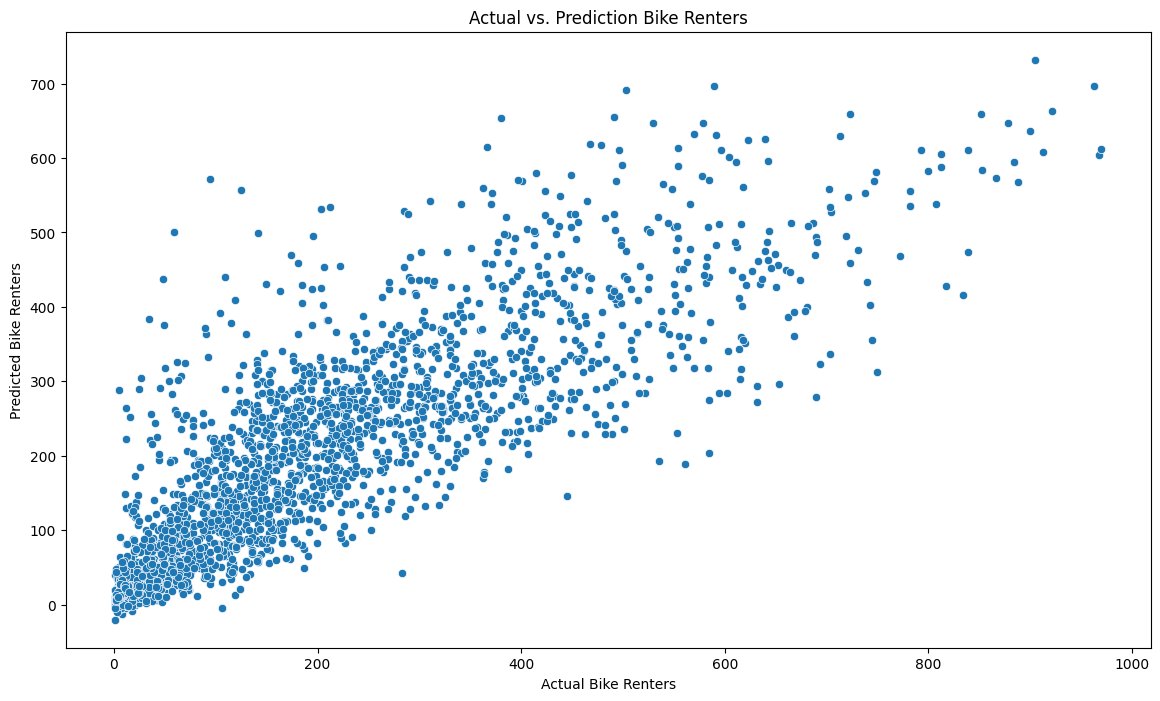

In [378]:
plt.figure(figsize = (14, 8))
plot = sns.scatterplot(x = y_test, y = y_pred_xgb_tuning).set(title = 'Actual vs. Prediction Bike Renters', 
                                               xlabel = 'Actual Bike Renters', 
                                               ylabel = 'Predicted Bike Renters');

There is a significant difference between RMSE and MAE due to massive error values. It is also obviously shown in the previous plot where a number of actual bike renters is lower than the number of predicted bike renters (overestimation) and subsequently a number of actual bike renters is higher than the number of predicted bike renters (underestimation).

## **Conclusions**

Based on the modeling simulation created, `atemp`, `temp`, and `hr` become the most prominent features that affect the number of potential bike renters.

- The larger the normalized feeling temperature (`atemp`), the more potential users in renting bikes.
- The larger the normalized temperature (`temp`), the more potential users in renting bikes.
- The closer it gets to midnight (`hr`), the more potential users in renting bikes.

The used evaluation metrics that are R-Squared, RMSE, MAE, and MAPE. After hyperparameter tuning is implemented on the chosen model, the result from MAPE value is approximately 86.22% which far from desirable. Unfortunately, this model is not sufficient enough to be used for predicting number of potential bike renters given the condition.

However with the provided data, the given feature is too limited to represent the aspect of number of potential renters as it only revolves around weather condition, humidity, season, weather, and time. Various factors such as the availability of the bikes, promotional offer, coverage area are some of the factors that may be considered as additional features during modeling process.

There are still lot of room for improvements for the current model to create a much better prediction. One of such solution would be implementing A/B testing to the current model to check the efficiency rate of the current model to the improvement of potential bike renters. From the A/B testing, insights might be gathered on what are things that can be improved for the model.

## **Recommendations**

From the previous analysis, several recommendations that may be suggested are as following:

- Adding more relevant features that have a stronger direct correlation with number of potential bike renters `cnt` and expanding such features not to be just revolving around weather condition such as availability of the bikes, coverage area, promotional offer given, and more.
- Expanding number of datasets by collecting more information on the latest date regarding bike-sharing systems so such information can be used to create a much better predictive model so it may generate a much better accuracy for the upcoming regression model.
- Exploring alternatives Machine Learning model that provides more complexity to further improve prediction accuracy such as Neural Network Regression model, however at the cost of incomprehensible of that sophisticated model.

## **Save Machine Learning**

In [391]:
# Import pickle

import pickle as pickle

In [392]:
# Save Machine Learning

pipe_model = Pipeline([('preprocessing', transformer), ('model', XGBRegressor())])
pipe_model.fit(X_train, y_train)

pickle.dump(pipe_model,open('data_bike_sharing.sav', 'wb'))

In [393]:
# Load Machine Learning

file_name = 'data_bike_sharing.sav'

loaded_model = pickle.load(open(file_name, 'rb'))

In [394]:
mean_absolute_percentage_error(y_test, loaded_model.predict(X_test))

0.8811191772697095

In [395]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

98.5566428442241